<a href="https://colab.research.google.com/github/townset/AAE-590-DSMM/blob/main/inclass_1_212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

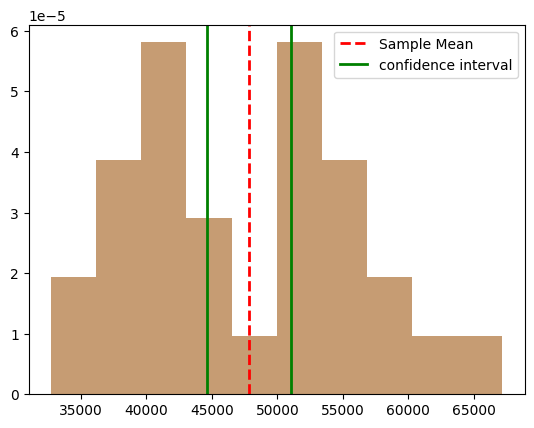

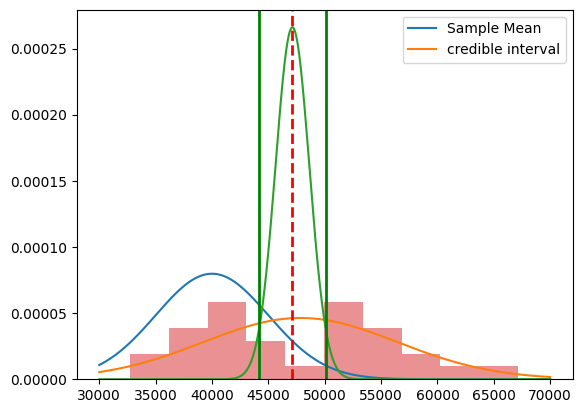

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

tfd = tfp.distributions
# Sample data
sample_size = 30.
sample_mean = 50000.
sample_stddev = 10000.
sample_data = tfd.Normal(loc=sample_mean, scale=sample_stddev).sample(sample_size)

plt.hist(sample_data, density=True, alpha=0.5);
sample_mean = tf.reduce_mean(sample_data)
sample_mean
# Standard error of the sample mean
sample_stddev = tf.math.reduce_std(sample_data)
standard_error = sample_stddev / tf.sqrt(sample_size)

# Margin of error
confidence_level = 0.95
degrees_of_freedom = sample_size - 1
t_distribution = tfp.distributions.StudentT(df=degrees_of_freedom, loc=0., scale=1.)

# t_distribution.quantile() seems to have a bug
t_value = t.ppf(confidence_level+(1-confidence_level)/2, df=sample_size-1)
margin_of_error = t_value * standard_error

confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = (confidence_interval_lower.numpy(), confidence_interval_upper.numpy())
confidence_interval
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], color='g', linewidth=2)
    plt.axvline(x=interval[1], color='g', linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])
    plt.show()

visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')


mu_prior = 40000.
sigma_prior = 5000.
prior = tfd.Normal(loc=mu_prior, scale=sigma_prior)
mu_likelihood = np.mean(sample_data)
sigma_likelihood = np.std(sample_data)
likelihood = tfd.Normal(loc=np.mean(sample_data), scale=np.std(sample_data))

# Compute the posterior distribution using Bayes' theorem
var_posterior = 1 / ((sample_size/(sigma_likelihood**2)) + (1/(sigma_prior**2)))
mu_posterior = var_posterior * (mu_prior/(sigma_prior**2) + (sample_size*mu_likelihood)/(sigma_likelihood**2))
posterior = tfd.Normal(mu_posterior, tf.sqrt(var_posterior))
credible_interval = (posterior.quantile(0.025).numpy(), posterior.quantile(0.975).numpy())
credible_interval

x = np.linspace(30000, 70000, 1000)

y_prior = prior.prob(x)
y_likelihood = likelihood.prob(x)
y_posterior = posterior.prob(x)

plt.plot(x,y_prior, label="Prior")
plt.plot(x,y_likelihood, label="Likelihood")
plt.plot(x,y_posterior, label="Posterior")

plt.legend();
visualize_output(sample_data, posterior.mean(), (posterior.quantile(0.025), posterior.quantile(0.975)), 'credible')
